In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import yfinance as yf # type: ignore


data_qqq = yf.download('QQQ', interval = '1wk', start='2017-01-01', end='2023-12-30')

data_gld = yf.download('GLD', interval = '1wk', start='2017-01-01', end='2023-12-30')

data_nkk = yf.download('N4US.L', interval = '1wk', start='2017-01-01', end='2023-12-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,14.147500,14.557500,14.147500,14.557500,14.557500,96035
2017-01-08,14.630000,14.630000,14.185000,14.450000,14.450000,270968
2017-01-15,14.210000,14.350000,14.030000,14.370000,14.370000,140878
2017-01-22,14.082500,14.550000,14.082500,14.490000,14.490000,306267
2017-01-29,14.380000,14.390000,14.070000,14.235000,14.235000,241452
...,...,...,...,...,...,...
2023-11-26,28.980000,28.990000,28.719999,28.915001,28.915001,2113
2023-12-03,28.690001,28.945000,28.240000,28.245001,28.245001,4974
2023-12-10,28.799999,28.799999,28.129999,28.129999,28.129999,0


In [50]:

data_qqq['Normalized value'] = (data_qqq['Adj Close'] / data_qqq['Adj Close'].iloc[0]) * 100

data_gld['Normalized value'] = (data_gld['Adj Close'] / data_gld['Adj Close'].iloc[0]) * 100

data_nkk['Normalized value'] = (data_nkk['Adj Close'] / data_nkk['Adj Close'].iloc[0]) * 100

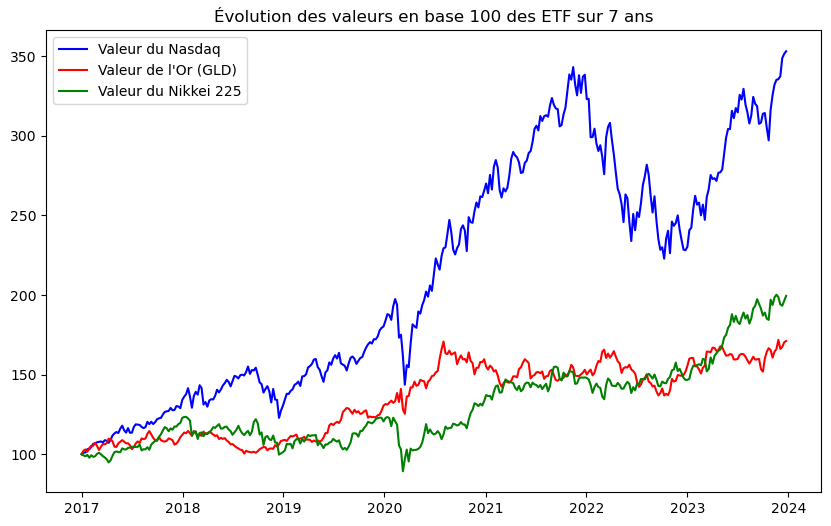

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(data_qqq['Normalized value'], label = 'Valeur du Nasdaq', color = 'blue')
plt.plot(data_gld['Normalized value'], label = "Valeur de l'Or (GLD)", color = 'red')
plt.plot(data_nkk['Normalized value'], label = 'Valeur du Nikkei 225', color = 'green')
plt.title('Évolution des valeurs en base 100 des ETF sur 7 ans')
plt.legend()
plt.show()

In [4]:
data_qqq['Returns'] = data_qqq['Adj Close'].pct_change().dropna()

data_gld['Returns'] = data_gld['Adj Close'].pct_change().dropna()

data_nkk['Returns'] = data_nkk['Adj Close'].pct_change().dropna()

data_returns = pd.concat([data_qqq['Returns'], data_gld['Returns'], data_nkk['Returns']], axis=1)

data_returns.columns = ['QQQ Returns', 'GLD Returns', 'NKK Returns']

data_returns = data_returns.dropna()

In [5]:
data_returns['QQQ Returns'].describe(include= 'all')

count    364.000000
mean       0.003895
std        0.029095
min       -0.112509
25%       -0.012074
50%        0.005383
75%        0.020742
max        0.095381
Name: QQQ Returns, dtype: float64

In [6]:
# Calcul du rendement hebdomadaire moyen
mean_return_qqq = data_returns['QQQ Returns'].mean()

# Calcul du rendement annualisé composé
annualized_return_qqq = (1 + mean_return_qqq) ** 52 - 1

# Affichage du résultat en pourcentage
print(f"Rendement annualisé du Nasdaq : {annualized_return_qqq * 100:.2f}%")

Rendement annualisé du Nasdaq : 22.40%


In [7]:
data_returns['GLD Returns'].describe(include= 'all')

count    364.000000
mean       0.001654
std        0.018892
min       -0.090574
25%       -0.008741
50%        0.001991
75%        0.012725
max        0.086646
Name: GLD Returns, dtype: float64

In [8]:
# Calcul du rendement hebdomadaire moyen
mean_return_gld = data_returns['GLD Returns'].mean()

# Calcul du rendement annualisé composé
annualized_return_gld = (1 + mean_return_gld) ** 52 - 1

# Affichage du résultat en pourcentage
print(f"Rendement annualisé de l'ETF Gold : {annualized_return_gld * 100:.2f}%")

Rendement annualisé de l'ETF Gold : 8.97%


In [9]:
data_returns['NKK Returns'].describe(include= 'all')

count    364.000000
mean       0.002198
std        0.024414
min       -0.134100
25%       -0.009389
50%        0.002613
75%        0.016273
max        0.085225
Name: NKK Returns, dtype: float64

In [10]:
# Calcul du rendement hebdomadaire moyen
mean_return_nkk = data_returns['NKK Returns'].mean()

# Calcul du rendement annualisé composé
annualized_return_nkk = (1 + mean_return_nkk) ** 52 - 1

# Affichage du résultat en pourcentage
print(f"Rendement annualisé du Nikkei 225 : {annualized_return_nkk * 100:.2f}%")

Rendement annualisé du Nikkei 225 : 12.10%


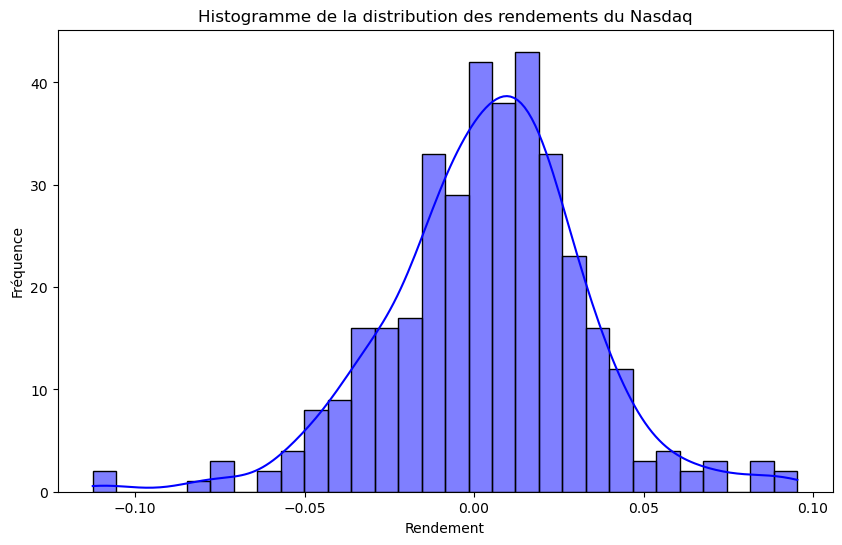

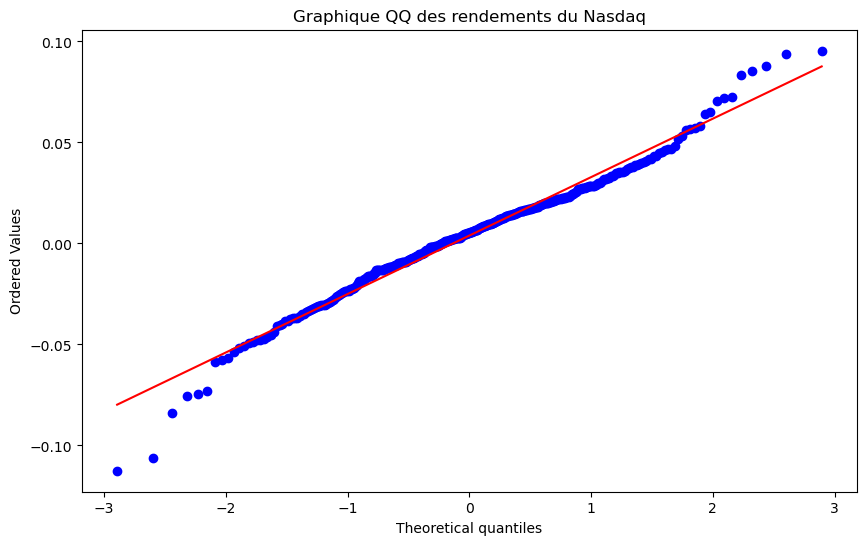

Résultats du test de Jarque-Bera :
Statistique Jarque-Bera : 38.89184706882375
P-valeur : 3.5870936362141386e-09
Asymétrie (Skewness) : -0.23974591343112264
Aplatissement (Kurtosis) : 4.527869496032217
Les données ne suivent pas une distribution normale (p < 0,05).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera


# 1. Histogramme de la distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_returns['QQQ Returns'], bins=30, kde=True, color='blue')
plt.title("Histogramme de la distribution des rendements du Nasdaq")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()

# 2. Graphique QQ
plt.figure(figsize=(10, 6))
stats.probplot(data_returns['QQQ Returns'], dist="norm", plot=plt)
plt.title("Graphique QQ des rendements du Nasdaq")
plt.show()

# 3. Test de normalité de Jarque-Bera
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(data_returns['QQQ Returns'])

print("Résultats du test de Jarque-Bera :")
print(f"Statistique Jarque-Bera : {jb_stat}")
print(f"P-valeur : {jb_pvalue}")
print(f"Asymétrie (Skewness) : {skew}")
print(f"Aplatissement (Kurtosis) : {kurtosis}")

if jb_pvalue < 0.05:
    print("Les données ne suivent pas une distribution normale (p < 0,05).")
else:
    print("Les données suivent une distribution normale (p >= 0,05).")

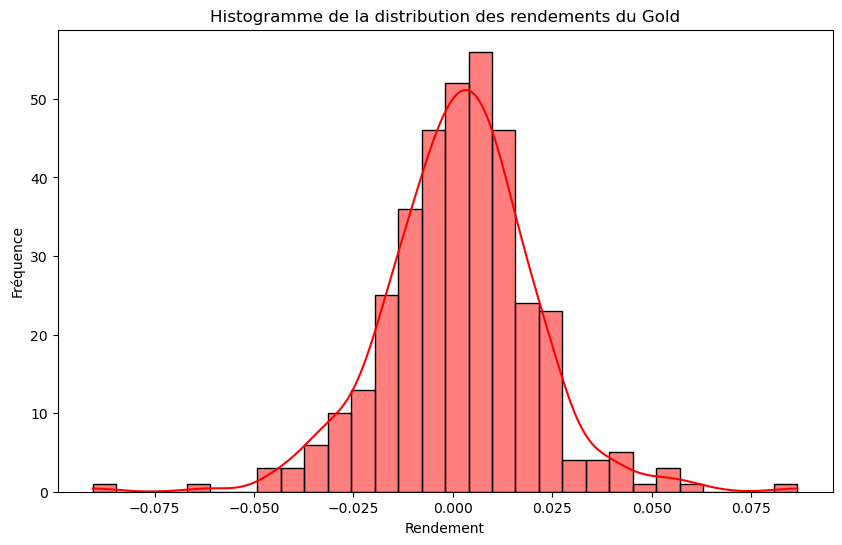

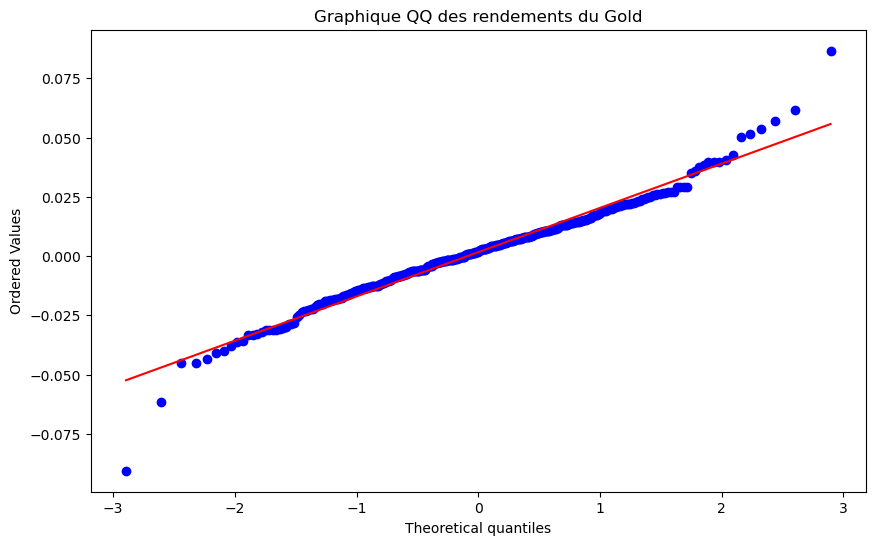

Résultats du test de Jarque-Bera :
Statistique Jarque-Bera : 110.22537377596245
P-valeur : 1.161085500535037e-24
Asymétrie (Skewness) : -0.0656862961817344
Aplatissement (Kurtosis) : 5.692647081243116
Les données ne suivent pas une distribution normale (p < 0,05).


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera


# 1. Histogramme de la distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_returns['GLD Returns'], bins=30, kde=True, color='red')
plt.title("Histogramme de la distribution des rendements du Gold")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()

# 2. Graphique QQ
plt.figure(figsize=(10, 6))
stats.probplot(data_returns['GLD Returns'], dist="norm", plot=plt)
plt.title("Graphique QQ des rendements du Gold")
plt.show()

# 3. Test de normalité de Jarque-Bera
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(data_returns['GLD Returns'])

print("Résultats du test de Jarque-Bera :")
print(f"Statistique Jarque-Bera : {jb_stat}")
print(f"P-valeur : {jb_pvalue}")
print(f"Asymétrie (Skewness) : {skew}")
print(f"Aplatissement (Kurtosis) : {kurtosis}")

if jb_pvalue < 0.05:
    print("Les données ne suivent pas une distribution normale (p < 0,05).")
else:
    print("Les données suivent une distribution normale (p >= 0,05).")

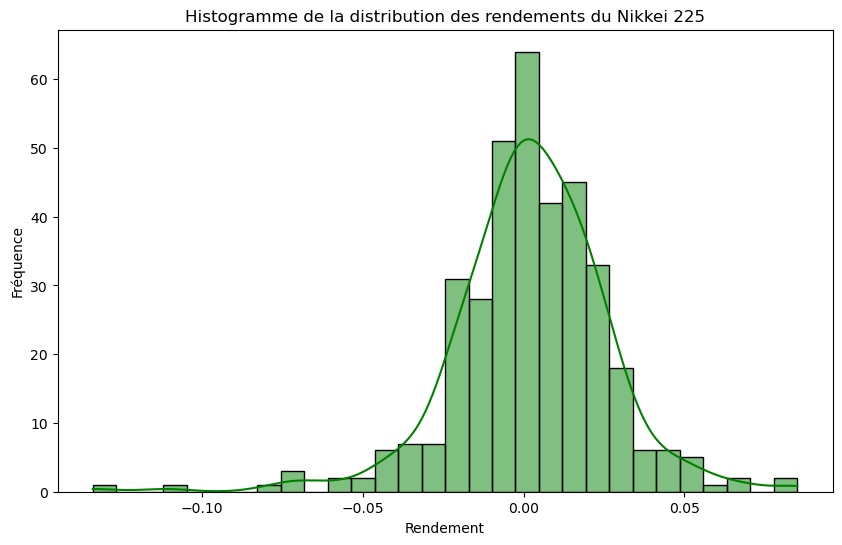

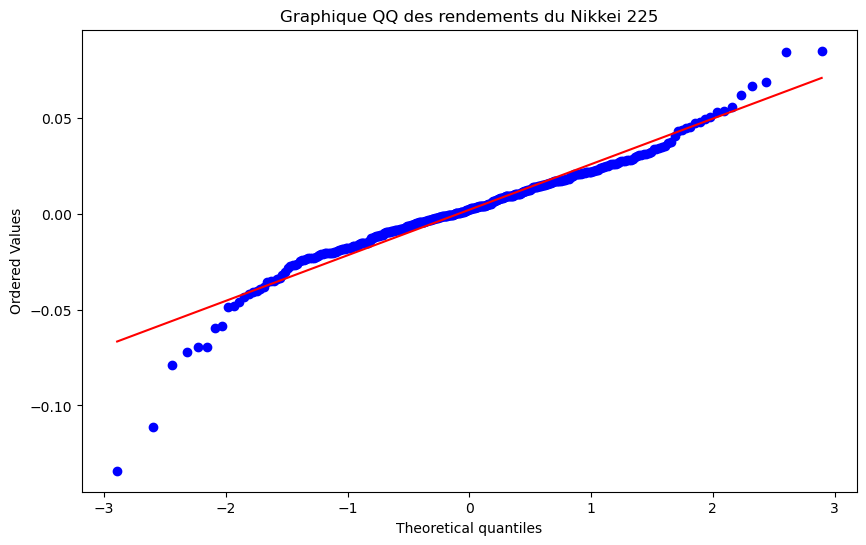

Résultats du test de Jarque-Bera :
Statistique Jarque-Bera : 330.0137625847959
P-valeur : 2.179826754376023e-72
Asymétrie (Skewness) : -0.7308826861075313
Aplatissement (Kurtosis) : 7.429716828196592
Les données ne suivent pas une distribution normale (p < 0,05).


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.stattools import jarque_bera


# 1. Histogramme de la distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_returns['NKK Returns'], bins=30, kde=True, color='green')
plt.title("Histogramme de la distribution des rendements du Nikkei 225")
plt.xlabel("Rendement")
plt.ylabel("Fréquence")
plt.show()

# 2. Graphique QQ
plt.figure(figsize=(10, 6))
stats.probplot(data_returns['NKK Returns'], dist="norm", plot=plt)
plt.title("Graphique QQ des rendements du Nikkei 225")
plt.show()

# 3. Test de normalité de Jarque-Bera
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(data_returns['NKK Returns'])

print("Résultats du test de Jarque-Bera :")
print(f"Statistique Jarque-Bera : {jb_stat}")
print(f"P-valeur : {jb_pvalue}")
print(f"Asymétrie (Skewness) : {skew}")
print(f"Aplatissement (Kurtosis) : {kurtosis}")

if jb_pvalue < 0.05:
    print("Les données ne suivent pas une distribution normale (p < 0,05).")
else:
    print("Les données suivent une distribution normale (p >= 0,05).")

In [14]:
# Calcul de la matrice de corrélation
correlation_matrix = data_returns.corr()

correlation_matrix

,QQQ Returns,GLD Returns,NKK Returns
QQQ Returns,1.000000,0.209468,0.518899
GLD Returns,0.209468,1.000000,0.046032
NKK Returns,0.518899,0.046032,1.000000


<Figure size 1000x500 with 0 Axes>

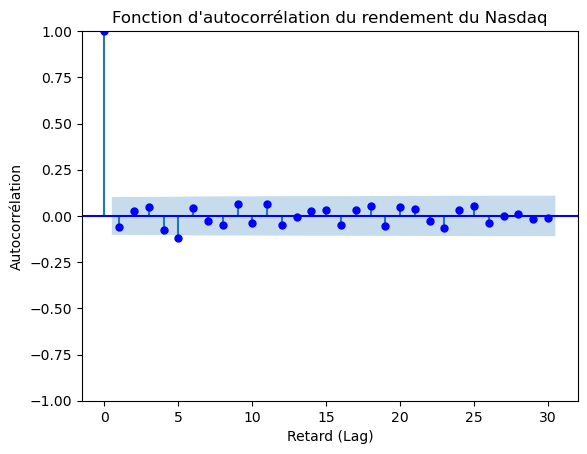

<Figure size 1000x500 with 0 Axes>

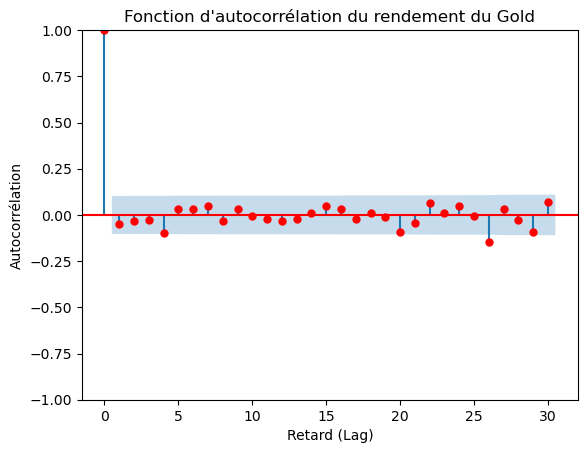

<Figure size 1000x500 with 0 Axes>

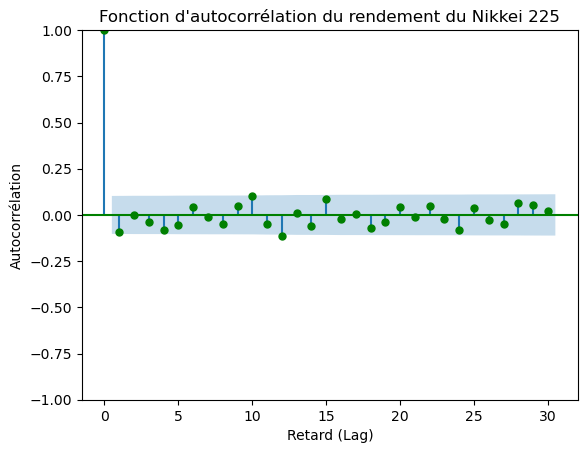

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Calcul et affichage des fonctions d'autocorrélation
plt.figure(figsize=(10, 5))
plot_acf(data_returns['QQQ Returns'], lags=30, color = 'blue')
plt.title("Fonction d'autocorrélation du rendement du Nasdaq")
plt.xlabel("Retard (Lag)")
plt.ylabel("Autocorrélation")
plt.show()


plt.figure(figsize=(10, 5))
plot_acf(data_returns['GLD Returns'], lags=30, color = 'red')
plt.title("Fonction d'autocorrélation du rendement du Gold")
plt.xlabel("Retard (Lag)")
plt.ylabel("Autocorrélation")
plt.show()


plt.figure(figsize=(10, 5))
plot_acf(data_returns['NKK Returns'], lags=30, color = 'green')
plt.title("Fonction d'autocorrélation du rendement du Nikkei 225")
plt.xlabel("Retard (Lag)")
plt.ylabel("Autocorrélation")
plt.show()

In [26]:
# Modèle ARIMA(6,0,0) pour le Nasdaq

from statsmodels.tsa.arima.model import ARIMA

model_qqq = ARIMA(data_returns['QQQ Returns'], order=(6,0,0))

result_qqq = model_qqq.fit()

result_qqq.summary()

c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            QQQ Returns   No. Observations:                  364
Model:                 ARIMA(6, 0, 0)   Log Likelihood                 776.828
Date:                Mon, 04 Nov 2024   AIC                          -1537.655
Time:                        07:51:37   BIC                          -1506.478
Sample:                    01-08-2017   HQIC                         -1525.263
                         - 12-24-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0039      0.002      2.562      0.010       0.001       0.007
ar.L1         -0.0605      0.045     -1.347      0.178      -0.149       0.028
ar.L2          0.0332      0.044      0.751      0.453      -0.053       0.120
ar.L3          0.0475      0.036      1.310      0.190      -0.024       0.118
ar.L4         -0.0795      0.042     -1.911      0.056      -0.161       0.002
ar.L5         -0.1283      0.052     -2.450      0.014      -0.231      -0.026
ar.L6          0.0291      0.049      0.598      0.550      -0.066       0.125
sigma2         0.0008   4.87e-05     16.824      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.56
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

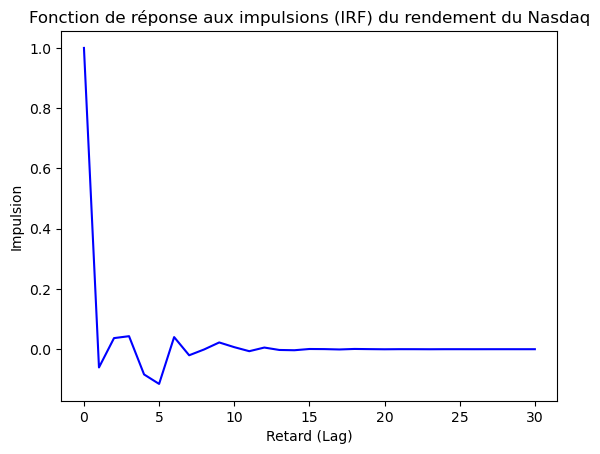

In [57]:
# Graphique de la fonction de réponse aux impulsions (IRF) pour le Nasdaq
irf_qqq = result_qqq.impulse_responses(steps=30)

irf_qqq.plot(color='blue')
plt.title("Fonction de réponse aux impulsions (IRF) du rendement du Nasdaq")
plt.xlabel("Retard (Lag)")
plt.ylabel("Impulsion")
plt.show()

In [44]:
model_gld = ARIMA(data_returns['GLD Returns'], order=(6,0,0))

result_gld = model_gld.fit()

result_gld.summary()

c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            GLD Returns   No. Observations:                  364
Model:                 ARIMA(6, 0, 0)   Log Likelihood                 931.655
Date:                Mon, 04 Nov 2024   AIC                          -1847.311
Time:                        08:20:16   BIC                          -1816.134
Sample:                    01-08-2017   HQIC                         -1834.919
                         - 12-24-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.001      1.863      0.062   -8.58e-05       0.003
ar.L1         -0.0541      0.046     -1.180      0.238      -0.144       0.036
ar.L2         -0.0336      0.040     -0.833      0.405      -0.113       0.045
ar.L3         -0.0381      0.051     -0.748      0.454      -0.138       0.062
ar.L4         -0.1011      0.055     -1.844      0.065      -0.209       0.006
ar.L5          0.0244      0.064      0.381      0.703      -0.101       0.150
ar.L6          0.0298      0.049      0.603      0.546      -0.067       0.127
sigma2         0.0004   2.07e-05     16.943      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.44
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

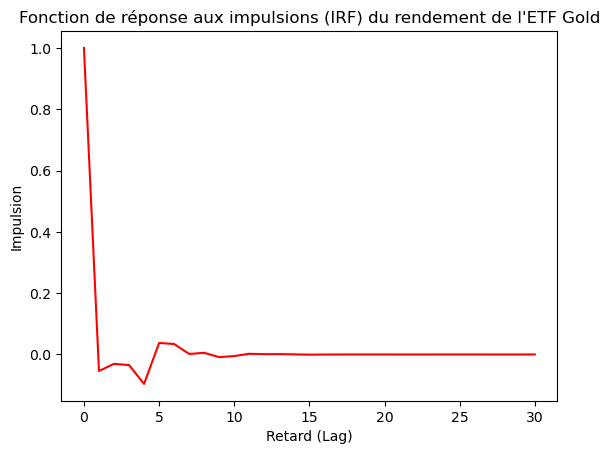

In [58]:
irf_gld = result_gld.impulse_responses(steps=30)

irf_gld.plot(color='red')
plt.title("Fonction de réponse aux impulsions (IRF) du rendement de l'ETF Gold")
plt.xlabel("Retard (Lag)")
plt.ylabel("Impulsion")
plt.show()

In [ ]:
model_nkk = ARIMA(data_returns['NKK Returns'], order=(6,0,0))

result_nkk = model_nkk.fit()

result_nkk.summary()

c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\Users\houss\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            NKK Returns   No. Observations:                  364
Model:                 ARIMA(6, 1, 1)   Log Likelihood                 832.368
Date:                Mon, 04 Nov 2024   AIC                          -1648.736
Time:                        09:47:27   BIC                          -1617.581
Sample:                    01-08-2017   HQIC                         -1636.352
                         - 12-24-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1114      0.041     -2.705      0.007      -0.192      -0.031
ar.L2         -0.0023      0.039     -0.060      0.952      -0.078       0.073
ar.L3         -0.0759      0.040     -1.898      0.058      -0.154       0.002
ar.L4         -0.0678      0.048     -1.411      0.158      -0.162       0.026
ar.L5         -0.0514      0.057     -0.898      0.369      -0.164       0.061
ar.L6          0.0473      0.053      0.887      0.375      -0.057       0.152
ma.L1         -0.9855      0.021    -47.142      0.000      -1.027      -0.945
sigma2         0.0006   2.77e-05     21.227      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               339.95
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.84
Prob(H) (two-sided):                  0.76   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

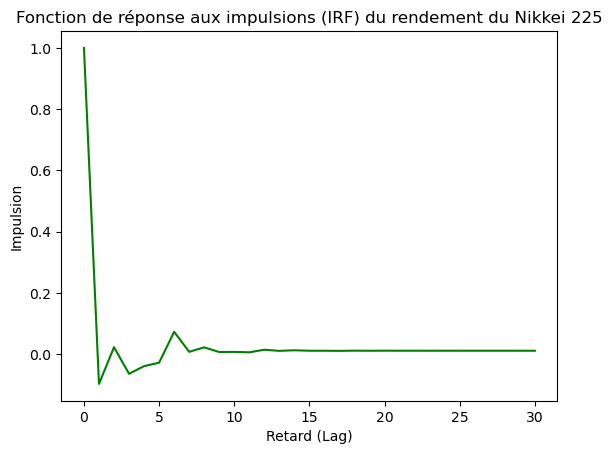

In [60]:
# Graphique de la fonction de réponse aux impulsions (IRF) pour le Nasdaq
irf_nkk = result_nkk.impulse_responses(steps=30)

irf_nkk.plot(color = 'green')
plt.title("Fonction de réponse aux impulsions (IRF) du rendement du Nikkei 225")
plt.xlabel("Retard (Lag)")
plt.ylabel("Impulsion")
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller, kpss

# Test ADF pour le Nasdaq

adf_result_qqq = adfuller(data_returns['QQQ Returns'])

print(f"Test ADF pour le rendement du Nasdaq : {adf_result_qqq}")

# Test KPSS pour le Nasdaq

kpss_result_qqq = kpss(data_returns['QQQ Returns'], regression='c')

print(f"Test KPSS pour le rendement du Nasdaq : {kpss_result_qqq}")

Test ADF pour le rendement du Nasdaq : (-9.855164856049566, 4.3791061199494e-17, 4, 359, {'1%': -3.4486972813047574, '5%': -2.8696246923288418, '10%': -2.571077032068342}, -1449.2879716964435)
Test KPSS pour le rendement du Nasdaq : (0.06931687763110066, 0.1, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\houss\AppData\Local\Temp\ipykernel_69732\2839634798.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_qqq = kpss(data_returns['QQQ Returns'], regression='c')


In [56]:
# Test ADF pour le Gold

adf_result_gld = adfuller(data_returns['GLD Returns'])

print(f"Test ADF pour le rendement du Gold : {adf_result_gld}")

# Test KPSS pour le Gold

kpss_result_gld = kpss(data_returns['GLD Returns'], regression='c')

print(f"Test KPSS pour le rendement du Gold : {kpss_result_gld}")

Test ADF pour le rendement du Gold : (-19.998993978989404, 0.0, 0, 363, {'1%': -3.448493650810824, '5%': -2.8695352280356556, '10%': -2.5710293341377715}, -1758.816670211792)
Test KPSS pour le rendement du Gold : (0.05975232889994852, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\houss\AppData\Local\Temp\ipykernel_69732\3992744597.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_gld = kpss(data_returns['GLD Returns'], regression='c')


In [42]:
# Test ADF pour le Nikkei 225

adf_result_nkk = adfuller(data_returns['NKK Returns'])

print(f"Test ADF pour le rendement du Nikkei 225 : {adf_result_nkk}")

# Test KPSS pour le Nikkei 225

kpss_result_nkk = kpss(data_returns['NKK Returns'], regression='c')

print(f"Test KPSS pour le rendement du Nikkei 225 : {kpss_result_nkk}")

Test ADF pour le rendement du Nikkei 225 : (-20.81717636795777, 0.0, 0, 363, {'1%': -3.448493650810824, '5%': -2.8695352280356556, '10%': -2.5710293341377715}, -1575.7110292155248)
Test KPSS pour le rendement du Nikkei 225 : (0.10598628545475378, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\houss\AppData\Local\Temp\ipykernel_69732\1689555994.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_nkk = kpss(data_returns['NKK Returns'], regression='c')
